# Speaker recognition

A Machine Learning project that recognizes the speaker in a given audio file from a list of possible speakers.


# Table of Contents

*   Abstract
*   DataSet
*   Short intro to audio
*   Preprocessing the data
*   Models
*   Splitting the data
*   SVM (support vector machine)
*   Random Forest
*  CNN - Convoluted neural network
*  RNN - Recursive Neural Network
*  Comparison
*  Conclusion

# Abstract 
This work aims to find the best technique to recognize a speaker from a pool of possibilities. 
The project will use various implementations and models learned throughout the semester to try and answer this question. 

# Dataset
This project used the [speaker recognition dataset created by kongaevans on kaggle](https://www.kaggle.com/datasets/kongaevans/speaker-recognition-dataset), uploaded to google collab using Kaggle services ([step 2- keggle.json](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)).

after downloading kaggle.json, please drag the file into the google collab files, and run the code box:


In [ ]:
## Import the dataset:
##   Add kaggle.json to files in google collab
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kongaevans/speaker-recognition-dataset
! unzip speaker-recognition-dataset.zip -d speaker-recognition-dataset
! pip install librosa
! pip install keras
! pip install pandas
! pip install matplotlib

The data is a collection of recordings of 5 known people (Benjamin Netanyahu, Jens Stoltenberg, Julia Gillard, Magaret Tarcher, Nelson Mandela) saved as .wav files, split into one-second segments each, sorted into directories by the speaker.

The libraries we will use in this project are as follows:

In [ ]:
## imports:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
import pandas as pd
# Audio manipulation
from scipy.io import wavfile
from scipy import signal


# Split to test and train
from sklearn.model_selection import train_test_split

## cross validtion:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# SVM - support vector machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import learning_curve


# Random forest
from sklearn.ensemble import RandomForestClassifier


# Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras import Input


# Short intro to audio
Spectrogram: visualizing and saving data of audio files consisting of:
```
[Amplitude X Time] dimension
```
 data into:

```
[Frequncy X Time X Amplitude] dimension.
```

usually, we will turn the wav file into a spectrogram, since it gives us the most information about the audio, and we can display it both as a matrix and as a picture to learn from it.

for example:


In [ ]:
fileName = "/content/speaker-recognition-dataset/16000_pcm_speeches/Benjamin_Netanyau/1.wav"

sr, signalDate = wavfile.read(fileName)

plt.subplot(121)
plt.title('Wav')
plt.plot(signalDate)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.specgram(signalDate,Fs=sr)
plt.title('Spectogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()


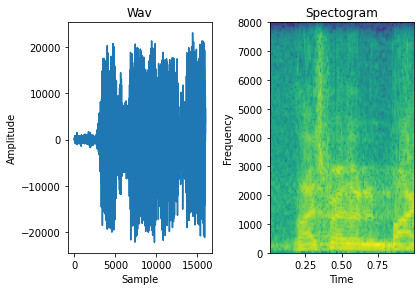

# Preprocessing the data

We create a pandas data frame of all the .wav files, consisting of 2 columns:spectrogram, and label (index of the speaker - given arbitrarily).

This will allow us to split the data easily and feed it later to different models.

In [ ]:

matrix1 = []
matrix2 = []

fileStr="/content/speaker-recognition-dataset/16000_pcm_speeches/"
names = ["Benjamin_Netanyau","Jens_Stoltenberg","Julia_Gillard","Magaret_Tarcher","Nelson_Mandela"]

for i in range(5):
  path_name = fileStr+names[i]+"/"
  for j in range(1500):
    full_path = path_name+str(j)+".wav"
    sample_rate, wav = wavfile.read(full_path)
    freq, time, spec = signal.spectrogram(wav, sample_rate, nperseg=sample_rate)
    ## for SVC and Random Froest
    matrix1.append([spec[:,0],i])
    ## for CNN and RNN
    matrix2.append([spec,i])

# Create a dataframe:
speaker_df1 = pd.DataFrame(matrix1,columns=['spectogram','label'])
X1=np.array(speaker_df1['spectogram'].tolist())
y1=np.array(speaker_df1['label'].tolist())

speaker_df2 = pd.DataFrame(matrix2,columns=['spectogram','label'])
X2=np.array(speaker_df2['spectogram'].tolist())
y2=np.array(speaker_df2['label'].tolist())


# Splitting the data
We have X - spectrograms, and y - labels.
We will split them into train and test, as 70% train and 30% test with randomization.
This will make the train and test diverse, and randomized both in training (with cross-validation) and in the final testing.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

# Models

In [ ]:
bestScores = {"SVC": None, "randomForest": None, "CNN": None, "RNN": None}

## SVM (support vector machine)

First, we will see how different complexity models perform, with different cross-validation split and different regularization strength

In [ ]:
### changing in complexity
##take 1:30 hours to run
c = [1,0.1,0.01,0.001]
splits = [3,5,7,10]
allScores = []
for i in range(4):
  cv = ShuffleSplit(n_splits=splits[i], test_size=0.3, random_state=0)
  for j in range(4):
    clf = svm.SVC(kernel='linear', C=c[j], gamma='scale')
    clf = clf.fit(X_train, y_train)
    allScores.append(cross_val_score(clf, X_train, y_train,cv=cv))





In [ ]:
allScores = np.array([[0.8428382 , 0.85145889, 0.87002653], [0.8428382 , 0.85145889, 0.87002653],[0.8428382 , 0.85145889, 0.87002653],[0.8428382 , 0.85145889, 0.87002653],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759], [0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759], [0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759], [0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759, 0.86472149, 0.8494695 ],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759, 0.86472149, 0.8494695 ],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759, 0.86472149, 0.8494695 ],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759,0.86472149, 0.8494695 ],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759,0.86472149, 0.8494695 , 0.86007958, 0.84681698, 0.84217507],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759,0.86472149, 0.8494695 , 0.86007958, 0.84681698, 0.84217507],[0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759,0.86472149, 0.8494695 , 0.86007958, 0.84681698, 0.84217507], [0.8428382 , 0.85145889, 0.87002653, 0.86074271, 0.84482759,0.86472149, 0.8494695 , 0.86007958, 0.84681698, 0.84217507]])


means = []
for i in allScores:
  print(i)
  means.append(np.mean(i))

plt.xlabel("Depth")
plt.ylabel("Score")
depth = range(0,16)
plt.plot(depth,means,"o--",color="r")
plt.legend(loc="best")
plt.show()

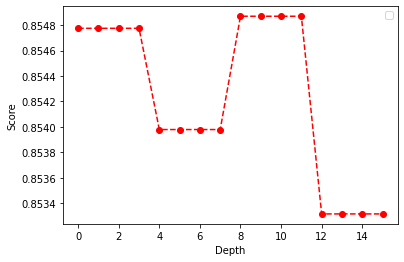

In [ ]:
## Running SVC with best results
means = []
for i in allScores:
  means.append(np.mean(i))
best_index = np.argmax(means) 
best_c = c[best_index%4]

# clf = svm.SVC(kernel='linear', C=best_c, gamma='scale')
clf = svm.SVC(kernel='linear', C=1, gamma='scale')
clf = clf.fit(X_train, y_train)
svcComplexScore = clf.score(X_test,y_test)
print(svcComplexScore)  # 0.861010101010101

we will now see how different sample size affects the model performance

In [ ]:
clf = svm.SVC(kernel='linear', C=1, gamma='scale')
cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=0)

In [ ]:
### changing in sample size
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        clf,
        X_train,
        y_train,
        cv=cv,
        n_jobs=10,
        return_times=True,
    )

## best sample amount

In [ ]:

# print("train_sizes = ",train_sizes)
# print("train_scores=",train_scores)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
title = "learning curves"

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

plt.plot(train_sizes,train_scores_mean,"o-",color="r",label="Training score")
plt.plot(train_sizes,test_scores_mean,"o-",color="g",label="Cross-validation score")
plt.title(title)
plt.legend(loc="best")
plt.show()

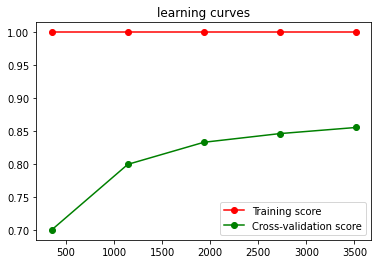

In [ ]:
clf = clf.fit(X_train, y_train)
svcSampleScore = clf.score(X_test,y_test)
print(svcSampleScore) # 0.861010101010101

In [ ]:
if (svcComplexScore > svcSampleScore):
  bestScores["SVC"] = svcComplexScore
else:
  bestScores["SVC"] = svcSampleScore

# Random Forest
we will see how different depths of trees in a forest will compare.

In Random Forest, there is no need for cross-validation, because the data is already randomly assigned, and therefore does the same job as a cross-validation would have done.

In [ ]:
scores = []
for i in range(1,16):
  clf = RandomForestClassifier(max_depth=i, random_state=0)
  clf.fit(X_train, y_train)
  scores.append(clf.score(X_test,y_test))
print(scores)
# [0.40606060606060607, 0.6690909090909091, 0.8521212121212122, 0.9014141414141414, 0.9305050505050505, 0.943030303030303, 0.9515151515151515, 0.9551515151515152, 0.9579797979797979, 0.96, 0.962020202020202, 0.9604040404040404, 0.9563636363636364, 0.9628282828282828, 0.96]

In [ ]:
depth = range(1,16)
plt.xlabel("Depth")
plt.ylabel("Score")
plt.plot(depth,scores,"o--",color="r")
plt.title("Random Forest")
plt.show()

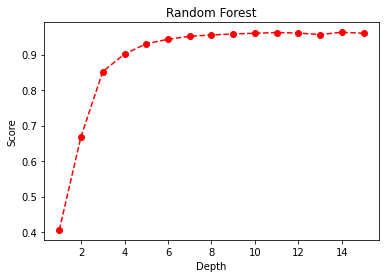

In [ ]:
bestScores["randomForest"] = scores[np.argmax(scores)]

print(bestScores)

# CNN - Convoluted neural network
we used a 14-layer model, using conv1D layers, maxPooling1D layers, Dense layers, and dropout layer (as regularization for overfitting).

the model was inspired by research on the best models for audio processing on the internet and later tweaked.

In [ ]:

model=Sequential()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=( 8001, 1)))

model.add(Conv1D(16, 1,padding='same'))
model.add(Conv1D(16,3,activation='relu',padding='same'))
model.add(Conv1D(16,3,activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(32, 1,padding='same'))
model.add(Conv1D(32,3,activation='relu',padding='same'))
model.add(Conv1D(32,3,activation='relu',padding='same'))
model.add(MaxPooling1D(2,2))

model.add(Conv1D(64, 1,padding='same'))
model.add(Conv1D(64,3,activation='relu',padding='same'))
model.add(Conv1D(64,3,activation='relu',padding='same'))
model.add(MaxPooling1D(2,2))

model.add(Conv1D(128, 1,padding='same'))
model.add(Conv1D(128,3,activation='relu',padding='same'))
model.add(Conv1D(128,3,activation='relu',padding='same'))
model.add(MaxPooling1D(2,2))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()


num_epochs = 10
history = model.fit(X_train2, y_train2, epochs=num_epochs, validation_data=(X_test2, y_test2))




In [ ]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('rate')
plt.xlabel('epoch')
plt.legend(['train_accuracy','test_accuracy'], loc='upper left')
plt.show()

test_accuracy=model.evaluate(X_test2,y_test2,verbose=0)
bestScores["CNN"] = test_accuracy[1]

print(bestScores["CNN"])

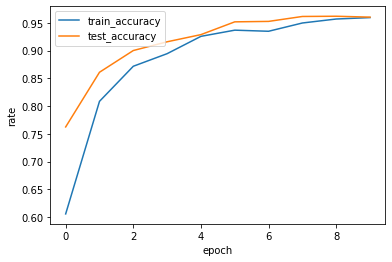

In [ ]:
predictions = model.predict([X_test])
# print the prediction
print(np.argmax(predictions[0]))

# print the label on y
print(y_test[0])



In [ ]:
# Keeping the scores without executing every model all the time
bestScores["CNN"] = 0.9773737192153931
bestScores = {'SVC': 0.861010101010101, 'randomForest': 0.9628282828282828, 'CNN': 0.9773737192153931, 'RNN': None}
print(bestScores)

In [ ]:
# Epoch 1/10
# 158/158 [==============================] - 276s 2s/step - loss: 100.1572 - accuracy: 0.6523 - val_loss: 0.6992 - val_accuracy: 0.8291
# Epoch 2/10
# 158/158 [==============================] - 283s 2s/step - loss: 0.8848 - accuracy: 0.8398 - val_loss: 0.7713 - val_accuracy: 0.8509
# Epoch 3/10
# 158/158 [==============================] - 264s 2s/step - loss: 0.8961 - accuracy: 0.8700 - val_loss: 0.2402 - val_accuracy: 0.9273
# Epoch 4/10
# 158/158 [==============================] - 262s 2s/step - loss: 0.2998 - accuracy: 0.9182 - val_loss: 0.1912 - val_accuracy: 0.9519
# Epoch 5/10
# 158/158 [==============================] - 262s 2s/step - loss: 0.2165 - accuracy: 0.9413 - val_loss: 0.2542 - val_accuracy: 0.9265
# Epoch 6/10
# 158/158 [==============================] - 261s 2s/step - loss: 0.1914 - accuracy: 0.9504 - val_loss: 0.1378 - val_accuracy: 0.9644
# Epoch 7/10
# 158/158 [==============================] - 262s 2s/step - loss: 0.1681 - accuracy: 0.9497 - val_loss: 0.1085 - val_accuracy: 0.9697
# Epoch 8/10
# 158/158 [==============================] - 265s 2s/step - loss: 0.0862 - accuracy: 0.9719 - val_loss: 0.0793 - val_accuracy: 0.9794
# Epoch 9/10
# 158/158 [==============================] - 262s 2s/step - loss: 0.0861 - accuracy: 0.9737 - val_loss: 0.1122 - val_accuracy: 0.9741
# Epoch 10/10
# 158/158 [==============================] - 262s 2s/step - loss: 0.0869 - accuracy: 0.9725 - val_loss: 0.0831 - val_accuracy: 0.9774
# Training completed in time:  0:44:23.664342

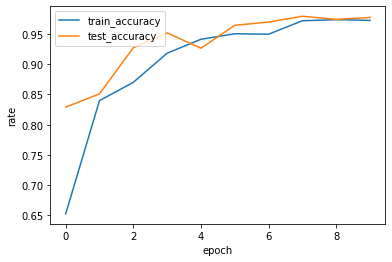

# RNN - Recursive Neural Network
we used a simple 3-layer model, using LSTM (long short term memory) and Dense layers.

The model was also inspired by research on the best models for audio processing on the internet and later tweaked.

In [ ]:


model = Sequential()

model.add(LSTM(32,input_shape=(8001,1)))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()



num_epochs = 10

history = model.fit(X_train2, y_train2, epochs=num_epochs, validation_data=(X_test2, y_test2))



In [ ]:
# Epoch 1/10
# 158/158 [==============================] - 567s 4s/step - loss: 1.5855 - accuracy: 0.2348 - val_loss: 1.4252 - val_accuracy: 0.3822
# Epoch 2/10
# 158/158 [==============================] - 565s 4s/step - loss: 1.4185 - accuracy: 0.4040 - val_loss: 1.2451 - val_accuracy: 0.4772
# Epoch 3/10
# 158/158 [==============================] - 575s 4s/step - loss: 1.2462 - accuracy: 0.4659 - val_loss: 1.1546 - val_accuracy: 0.4905
# Epoch 4/10
# 158/158 [==============================] - 569s 4s/step - loss: 1.1722 - accuracy: 0.4864 - val_loss: 1.0985 - val_accuracy: 0.5006
# Epoch 5/10
# 158/158 [==============================] - 569s 4s/step - loss: 1.1534 - accuracy: 0.4850 - val_loss: 1.0478 - val_accuracy: 0.5103
# Epoch 6/10
# 158/158 [==============================] - 573s 4s/step - loss: 1.1361 - accuracy: 0.4911 - val_loss: 1.0950 - val_accuracy: 0.5095
# Epoch 7/10
# 158/158 [==============================] - 569s 4s/step - loss: 1.1033 - accuracy: 0.4997 - val_loss: 1.0350 - val_accuracy: 0.5075
# Epoch 8/10
# 158/158 [==============================] - 569s 4s/step - loss: 1.1014 - accuracy: 0.5120 - val_loss: 1.0399 - val_accuracy: 0.4869
# Epoch 9/10
# 158/158 [==============================] - 568s 4s/step - loss: 1.0832 - accuracy: 0.5023 - val_loss: 1.0133 - val_accuracy: 0.5135
# Epoch 10/10
# 158/158 [==============================] - 571s 4s/step - loss: 1.0819 - accuracy: 0.5110 - val_loss: 1.0115 - val_accuracy: 0.5180

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('rate')
plt.xlabel('epoch')
plt.legend(['train_accuracy','test_accuracy'], loc='upper left')
plt.show()

test_accuracy=model.evaluate(X_test2,y_test2,verbose=0)
print(test_accuracy[1])

bestScores["RNN"] = test_accuracy[1]

print(bestScores["RNN"]) #0.5179798007011414

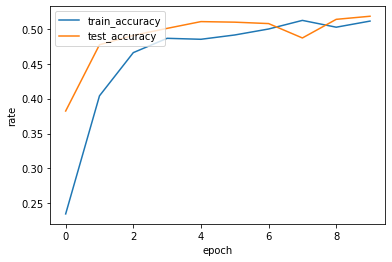

In [ ]:
predictions = model.predict([X_test])
print(np.argmax(predictions[0]))

print(y_test[0])


In [ ]:
print(bestScores) #{'SVC': 0.861010101010101, 'randomForest': 0.9628282828282828, 'CNN': 0.9773737192153931, 'RNN': 0.5179798007011414}

# Comparassion

This is the comparison of all the models we have discussed in this project:


In [ ]:
fig=plt.figure(figsize=(14,8),)
plt.xlabel('Model Types',size=16)
plt.ylabel('Accruacy Score',size=16)
keys = bestScores.keys()
values = bestScores.values()
plt.bar(keys,values,figure=fig)

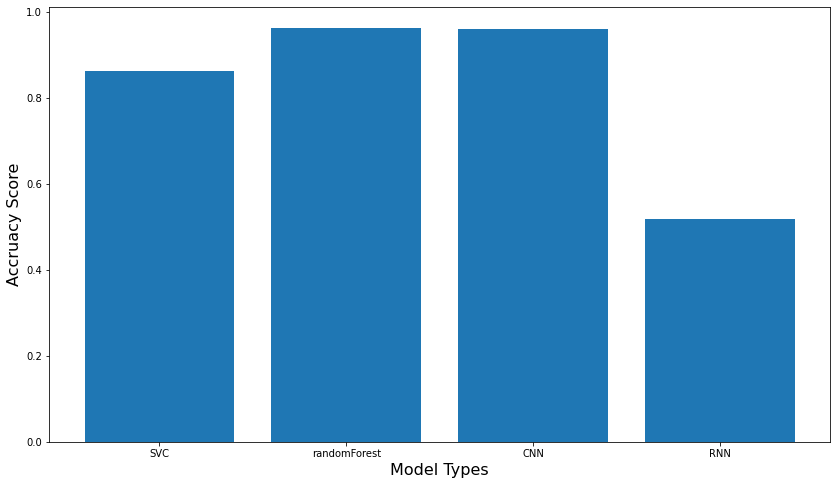

In [ ]:
print(bestScores)
maxScore = 0
maxModel = ""
for key,value in bestScores.items():
  if maxScore >= value:
    continue  
  maxScore = value
  maxModel = key
print(f"the best model for speaker recognition according to our findins is {maxModel} with the score of {maxScore}")

# conclusion
In conclusion, the best model for speaker regocnition according to our findins is **Random Forest** with the score of **0.9628**.